<a href="https://www.kaggle.com/code/ramonnunes/police-shootings-my-first-data-analysis?scriptVersionId=91780134" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt 
from collections import Counter
import plotly.express as px
import seaborn as sns
import datetime

df=pd.read_csv('../input/data-police-shootings/fatal-police-shootings-data.csv')

In [2]:
df.sample(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
3221,3550,George Pappas,2018-03-28,shot,knife,61.0,M,W,Surprise,AZ,False,other,Not fleeing,False
2409,2669,Robert J. Berube,2017-06-16,shot,gun,41.0,M,W,Water Valley,MS,False,attack,Car,False
3276,3637,Kendall Lemoine,2018-04-11,shot,gun,50.0,M,W,Winn Parish,LA,False,attack,Not fleeing,False
639,771,Julian Hoffman,2015-08-23,shot,toy weapon,21.0,M,W,Brick Township,NJ,False,attack,Not fleeing,False
2513,2797,Vicente Velasquez,2017-07-21,shot,gun,42.0,M,H,Mission,TX,False,attack,Foot,False
913,1054,Florencio Lucero,2015-12-02,shot,gun,36.0,M,H,Deming,NM,False,attack,Not fleeing,False
524,656,Saige Hack,2015-07-16,shot,gun,23.0,M,N,Cheyenne,WY,False,attack,Not fleeing,False
3704,4067,Joseph Dawson,2018-09-28,shot,gun,24.0,M,W,Johns Island,SC,False,attack,Not fleeing,False
138,178,Glenn Lewis,2015-02-25,shot,NaN,27.0,M,B,Oklahoma City,OK,False,other,Car,False
4260,4697,TK TK,2019-05-01,shot,knife,NaN,M,NaN,Bruce,FL,False,other,Not fleeing,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5189 non-null   object 
 5   age                      5181 non-null   float64
 6   gender                   5414 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null   bool   
 11  threat_level             5416 non-null   object 
 12  flee                     5167 non-null   object 
 13  body_camera              5416 non-null   bool   
dtypes: bool(2), float64(1), 

# Data cleaning

## Parsing the date

In [4]:
df['date']=pd.to_datetime(df['date'], format = "%Y-%m-%d")

In [5]:
df['months']=df['date'].dt.month
df['years']=df['date'].dt.year

In [6]:
df.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                      227
age                        235
gender                       2
race                       521
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       249
body_camera                  0
months                       0
years                        0
dtype: int64

## Only checking if there is some coincidence with null armed values

In [7]:
df.loc[df['armed'].isnull()]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,months,years
15,29,Loren Simpson,2015-01-08,shot,NaN,28.0,M,W,Huntley,MT,False,undetermined,Not fleeing,False,1,2015
26,49,Marcus Golden,2015-01-14,shot,NaN,24.0,M,B,St. Paul,MN,False,attack,Not fleeing,False,1,2015
27,50,Michael Goebel,2015-01-14,shot,NaN,29.0,M,W,Franklin County,MO,False,attack,Not fleeing,False,1,2015
45,85,Dewayne Carr,2015-01-20,shot,NaN,42.0,M,B,Scottsdale,AZ,False,other,Car,False,1,2015
52,101,Demaris Turner,2015-01-23,shot,NaN,29.0,M,B,Fort Lauderdale,FL,False,other,Not fleeing,False,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3348,3672,Juan Alberto Silva,2018-05-07,shot,NaN,32.0,M,H,Orlando,FL,False,attack,Car,False,5,2018
3384,3700,Jimmy Alan Moss,2018-05-19,shot,NaN,77.0,M,W,Sunridge,NV,False,attack,NaN,False,5,2018
3389,3719,Ronald Clinton,2018-05-21,shot,NaN,47.0,M,B,West Memphis,AR,False,attack,Car,False,5,2018
3414,3730,Gus Tousis,2018-06-02,shot,NaN,43.0,M,B,Chicago,IL,False,attack,Car,False,6,2018


In [8]:
df['armed'].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', nan, 'shovel',
       'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver',
       'carjack', 'chain', "contractor's level", 'unknown weapon',
       'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'vehicle', 'baton', 'spear', 'chair', 'pitchfork',
       'hatchet and gun', 'rock', 'piece of wood', 'bayonet', 'pipe',
       'glass shard', 'motorcycle', 'pepper spray', 'metal rake',
       'crowbar', 'oar', 'machete and gun', 'tire iron',
 

## As we can see there are a bunch of names. I will classify these by hand.

In [9]:
df['armed']=df['armed'].str.lower()
gun=['gun', 'guns and explosives','crossbows','gun and knife','hatchet and gun','machete and gun','gun and sword', 'gun and car','incendiary device','gun and vehicle','vehicle and gun','grenade','crossbow']
perforating_weapon=['nail gun','knife','hatchet','baseball bat and knife','sword', 'machete','box cutter','screwdriver','lawn mower blade','sharp object','meat cleaver','beer bottle','straight edge razor','ax','chain saw', 'garden tool', 'scissors','pick-axe','spear','pitchfork','bayonet','glass shard','metal rake','crowbar','pole and knife','pen','chainsaw','samurai sword', 'bow and arrow','ice pick','pellet gun']
no_perforating_weapon=['shovel','hammer','metal object','flagpole','cordless drill','metal pole', 'metal pipe', 'metal hand tool','blunt object','metal stick','chain', "contractor's level",'stapler','bean-bag gun','baseball bat and fireplace poker', 'brick', 'baseball bat', 'hand torch','pole','flashlight','baton','chair','rock', 'piece of wood','pipe','oar', 'tire iron','air conditioner','baseball bat and bottle','fireworks','wrench','walking stick','barstool']
vehicle=['vehicle','carjack','motorcycle','vehicle and machete','car, knife and mace']
non_lethal=['taser','wasp spray','pepper spray']
fake_gun=['claimed to be armed','toy weapon','bb gun and vehicle','air pistol','airsoft pistol','bb gun']
undertermined=['undertemined','unknown weapon',np.nan]
for i,x in enumerate(df['armed']):
    if x in gun:
         df['armed'][i]='Gun'
    elif x in perforating_weapon:
         df['armed'][i]='Perforating_weapon'   
    elif x in no_perforating_weapon:
         df['armed'][i]='no_perforating_weapon' 
    elif x in vehicle:
         df['armed'][i]='Vehicle'     
    elif x in non_lethal:
         df['armed'][i]='Non_lethal' 
    elif x in fake_gun:
         df['armed'][i]='Fake_gun' 
    elif x in undertermined:
         df['armed'][i]='undetermined'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/conda/lib/python3.7/site-packag

## We need to see the ages now.

In [10]:
(df['age'].isnull().sum()/df['age'].shape[0])*100

4.338995568685377

## We have 4% of our ages as null. Our approach is going to be filling those null values by taking the median of their city or state in case of less than 10 rows

In [11]:
for x in df.loc[df['age'].isnull(),['city','state','id']].values:
    city,state,i=x
    if df.loc[df['city']==city,'age'].median()>10:
        df.loc[df['id']==i,'age']=df.loc[df['city']==city,'age'].median()
    else:
         df.loc[df['id']==i,'age']=df.loc[df['state']==state,'age'].median()

## We're going to fill null values of races with U of Undetermined

In [12]:
df['race'].fillna('U',inplace=True)

In [13]:
df.dropna(inplace=True)

# Data Analysis

# Deaths by Race:

<BarContainer object of 7 artists>

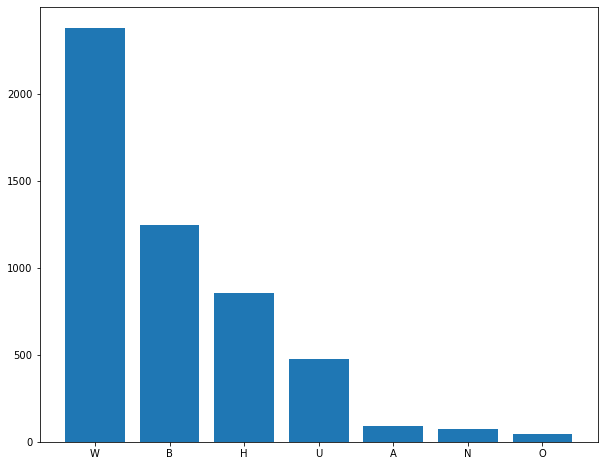

In [14]:
fig, ax1 = plt.subplots(figsize=(10,8))
race_types=df['race'].value_counts().index
amount_race=df['race'].value_counts().values
ax1.bar(race_types,amount_race)

## The percentage of people from White race, in USA, is 63.4%, the percentage of Latinos and Black are 15% and 13.4%. Therefore we can assume that Latinos and African americans die more with regards of their own population.

# Time Distribution

## Let's take a look in the time distribution.

Text(0.5, 0, 'Days')

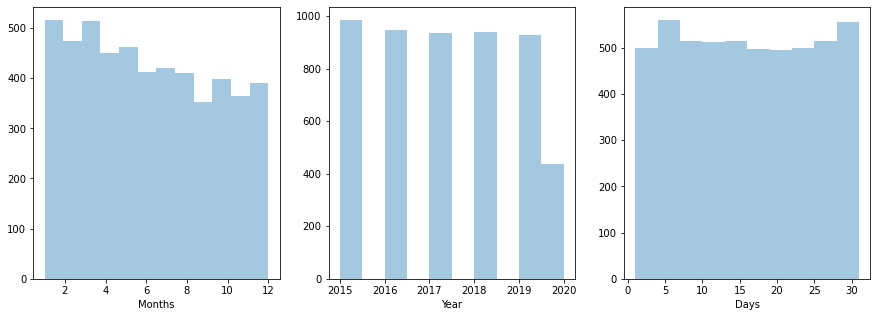

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))

days=df['date'].dt.day

sns.distplot(df['years'].values,kde=False,bins=10,ax=ax2)
ax2.set_xlabel('Year')
sns.distplot(df['months'].values,kde=False,bins=12,ax=ax1)
ax1.set_xlabel('Months')
sns.distplot(days,kde=False,bins=10,ax=ax3)
ax3.set_xlabel('Days')

## The time distribution is somewhat uniform, except for the distribution of months which is right skewed.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5165 entries, 0 to 5415
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       5165 non-null   int64         
 1   name                     5165 non-null   object        
 2   date                     5165 non-null   datetime64[ns]
 3   manner_of_death          5165 non-null   object        
 4   armed                    5165 non-null   object        
 5   age                      5165 non-null   float64       
 6   gender                   5165 non-null   object        
 7   race                     5165 non-null   object        
 8   city                     5165 non-null   object        
 9   state                    5165 non-null   object        
 10  signs_of_mental_illness  5165 non-null   bool          
 11  threat_level             5165 non-null   object        
 12  flee                     5165 non-

# Weapons

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text major ticklabel objects>)

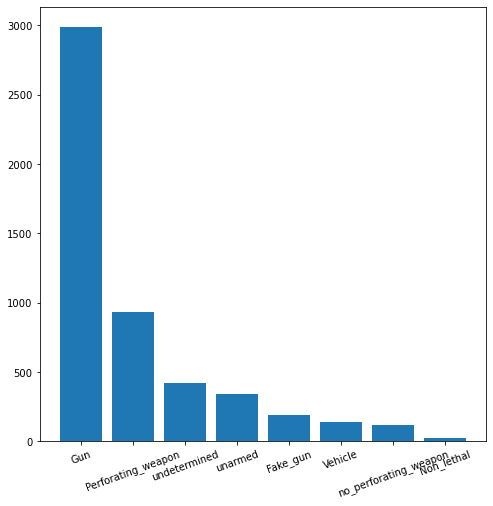

In [17]:
fig, ax1 = plt.subplots(figsize=(8,8))
x=df['armed'].value_counts().index.values
y=df['armed'].value_counts().values
ax1.bar(x,y)
plt.xticks(rotation=20)

## There is much more chance to be shot dead if carrying a perforating weapon than carrying a no perforating weapon.

# Age and Gender

<BarContainer object of 2 artists>

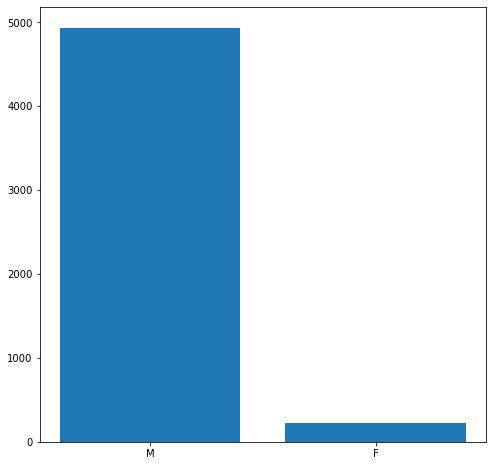

In [18]:
fig, ax1 = plt.subplots(figsize=(8,8))
x=df['gender'].value_counts().index
y=df['gender'].value_counts().values
ax1.bar(x,y)

## The number of men killed by the police is much greater than the number of women

([<matplotlib.axis.XTick at 0x7feaa236ff50>,
 <a list of 11 Text major ticklabel objects>)

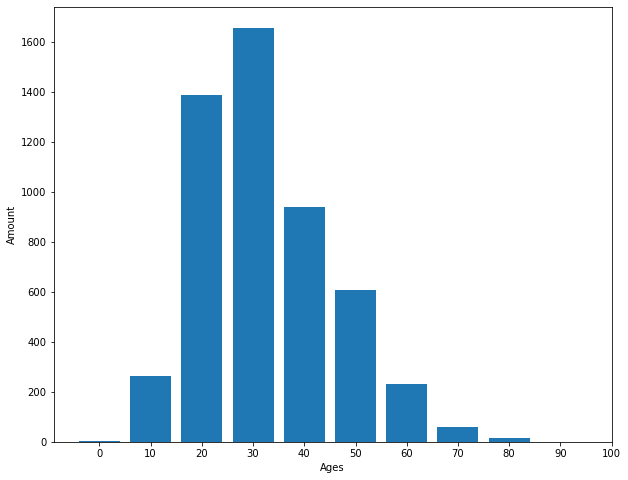

In [19]:
fig, ax1 = plt.subplots(figsize=(10,8))
ax1.set_xlabel('Ages')
ax1.set_ylabel('Amount')
age_values=Counter(min(x//10*10,90) for x in df['age'].values )
ax1=plt.bar(age_values.keys(),age_values.values(),width=8)
plt.xticks([10 * i for i in range(11)])

# Most violent States and Cities

<BarContainer object of 5 artists>

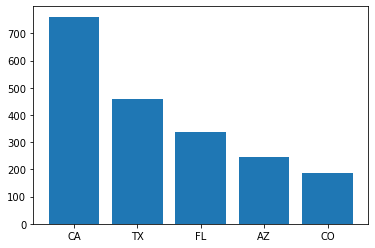

In [20]:
y=df.state.value_counts().values[0:5]
x=df.state.value_counts().index[0:5]
plt.bar(x,y)

<BarContainer object of 5 artists>

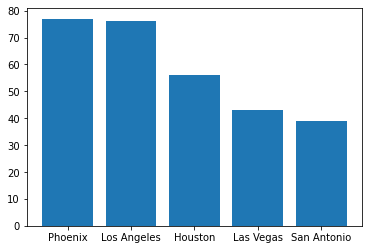

In [21]:
y=df.city.value_counts().values[0:5]
x=df.city.value_counts().index[0:5]
plt.bar(x,y)

# Mental Illness and Age

In [22]:
ages=Counter(min(x//10*10,90) for x in df['age'].values )
df['count']=1
fig = px.bar(df, x="age", y='count', color="signs_of_mental_illness")
fig.show()

## People between 50 and 80 years old have, generaly 30% - 35% chances of having mental illness.

# Races and Threat Level

In [23]:
threat_level = df[['race','threat_level']]
threat_level ['kills'] =1
threat_level  = threat_level .groupby(['race','threat_level']).sum()
threat_level = threat_level.reset_index()
fig = px.bar(threat_level , y='kills', x='threat_level',color='race', barmode='group')
fig.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

